In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [2]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# Dimension of the dataset
print(np.shape(df))

(506, 14)


In [4]:
# Let's summarize the data to see the distribution of data
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

C:\Users\sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


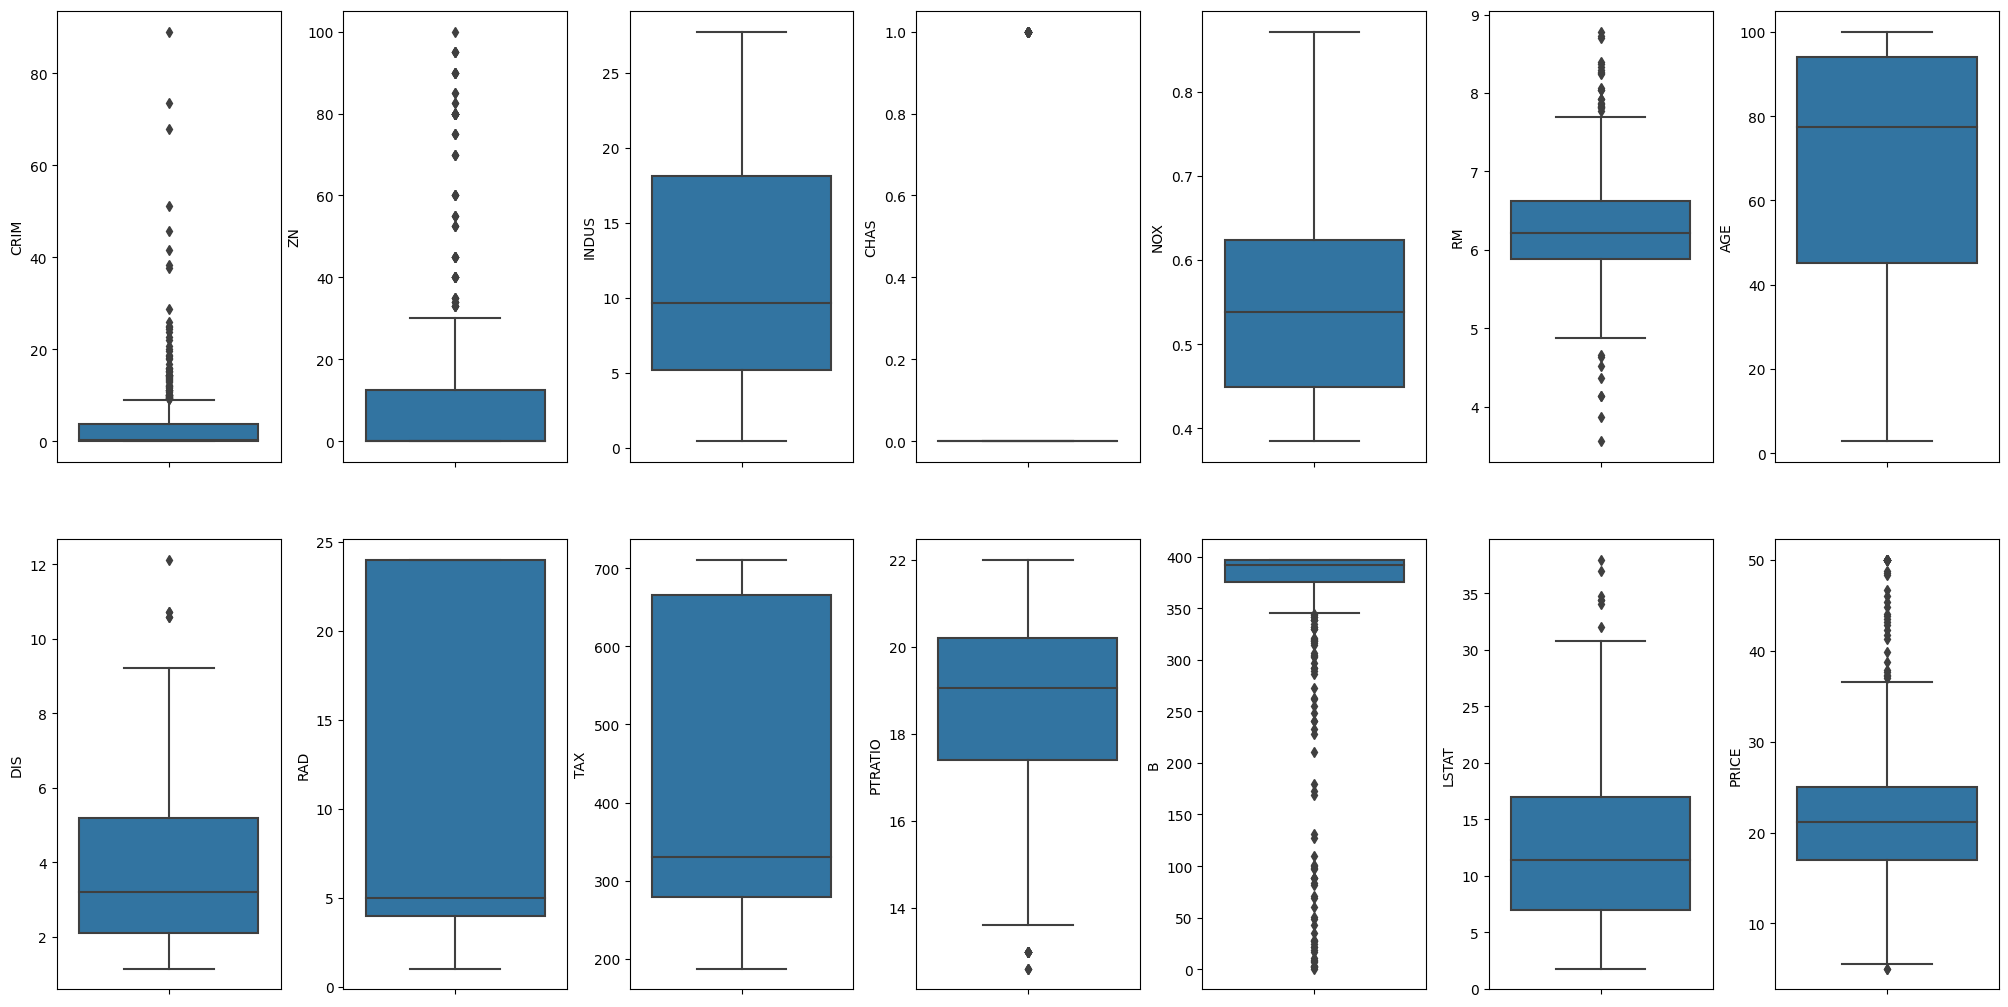

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [6]:
  for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column PRICE outliers = 7.91%


In [7]:
df = df[~(df['PRICE'] >= 35.0)]
print(np.shape(df))

(458, 14)


In [8]:
#Looking at the data with names and target variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [9]:
#Shape of the data
print(df.shape)

(458, 14)


In [10]:
#Checking the null values in the dataset
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [11]:
#Checking the statistics of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,3.880713,10.180131,11.588166,0.058952,0.558875,6.156945,69.170524,3.807797,9.842795,417.893013,18.676201,353.521965,13.490699,20.320087
std,8.973996,21.950057,6.756057,0.235792,0.117724,0.563489,28.008853,2.125004,8.884462,168.736868,2.027875,95.363794,6.967358,6.185151
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.980000,5.000000
25%,0.084020,0.000000,5.860000,0.000000,0.453000,5.871250,45.725000,2.100175,4.000000,287.000000,17.600000,373.105000,7.927500,16.200000
50%,0.256510,0.000000,9.900000,0.000000,0.538000,6.152000,78.400000,3.199200,5.000000,345.000000,19.200000,391.880000,12.370000,20.400000
75%,4.082653,0.000000,18.100000,0.000000,0.624000,6.481750,94.300000,5.214600,24.000000,666.000000,20.200000,396.397500,17.302500,23.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,34.900000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     458 non-null    float64
 1   ZN       458 non-null    float64
 2   INDUS    458 non-null    float64
 3   CHAS     458 non-null    int64  
 4   NOX      458 non-null    float64
 5   RM       458 non-null    float64
 6   AGE      458 non-null    float64
 7   DIS      458 non-null    float64
 8   RAD      458 non-null    int64  
 9   TAX      458 non-null    float64
 10  PTRATIO  458 non-null    float64
 11  B        458 non-null    float64
 12  LSTAT    458 non-null    float64
 13  PRICE    458 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 53.7 KB


In [ ]:
#Visualisation

<Axes: xlabel='PRICE', ylabel='Count'>

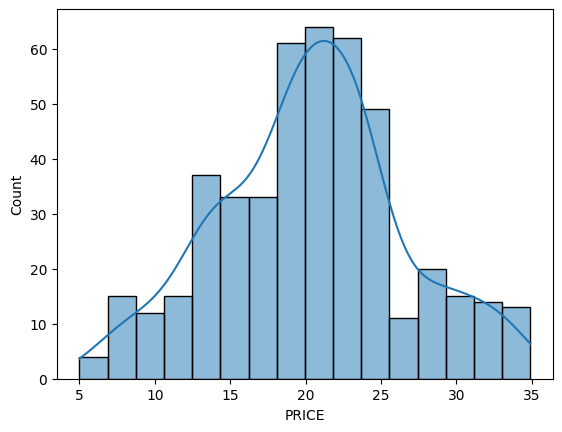

In [13]:
#checking the distribution of the target variable
import seaborn as sns
sns.histplot(df.PRICE , kde = True)

<Axes: >

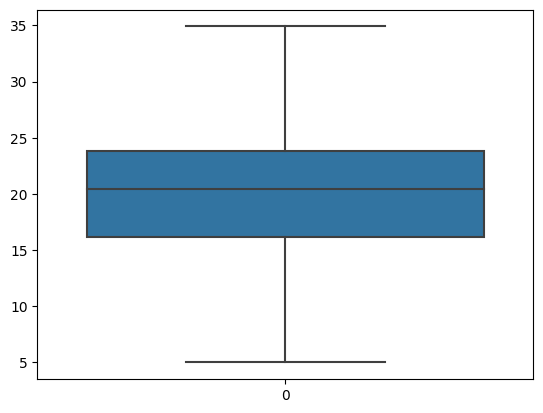

In [14]:
#Distribution using box plot
sns.boxplot(df.PRICE)

In [15]:
#checking Correlation of the data 
correlation = df.corr()
correlation.loc['PRICE']

CRIM      -0.509111
ZN         0.432791
INDUS     -0.598380
CHAS       0.098362
NOX       -0.584249
RM         0.540151
AGE       -0.571890
DIS        0.461164
RAD       -0.515860
TAX       -0.587285
PTRATIO   -0.471471
B          0.404020
LSTAT     -0.780531
PRICE      1.000000
Name: PRICE, dtype: float64

<Axes: >

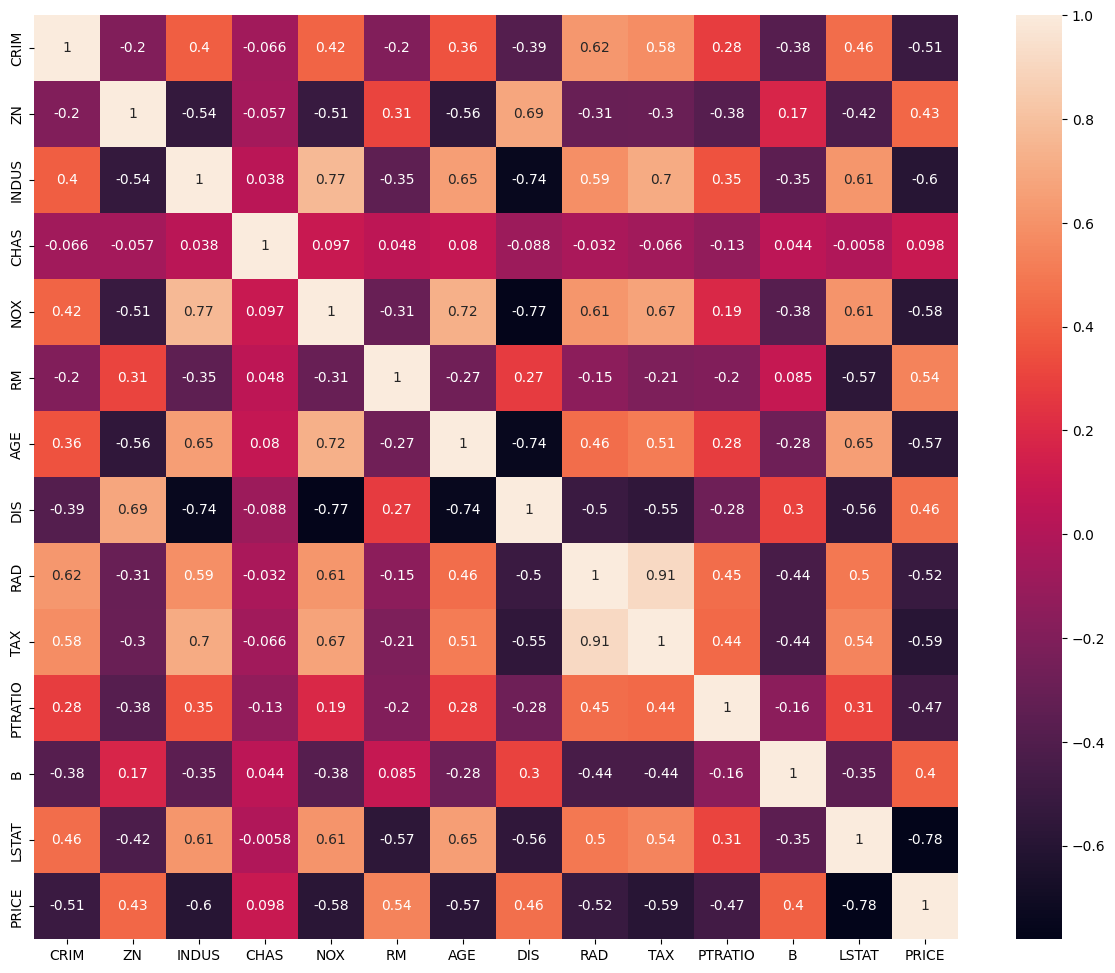

In [16]:
# plotting the heatmap
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

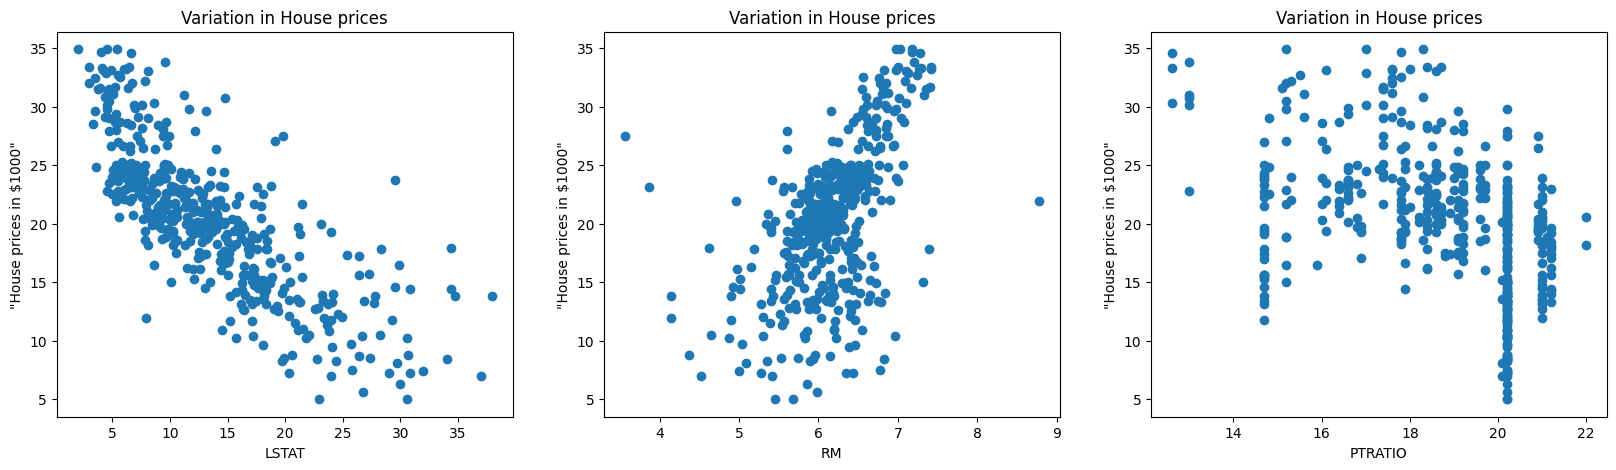

In [17]:
# Checking the scatter plot with the most correlated features
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = df.PRICE
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [ ]:
#Splitting the dependent feature and independent feature

In [18]:
#X = data[['LSTAT','RM','PTRATIO']]
X = df.iloc[:,:-1]
y= df.PRICE

In [19]:
#Splitting the data for Model Validation

In [20]:
# Splitting the data into train and test for building the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [21]:
#Building the Model

In [22]:
#Linear Regression 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [23]:
#Fitting the model
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
#Model Evaluation

In [25]:
#Prediction on the test dataset
y_pred = regressor.predict(X_test)

In [26]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.0613157648526776


In [27]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7443761652148478


In [28]:
#Neural Networks

In [29]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
#Creating the neural network model
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

C:\Users\sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 443.7916
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 402.2749 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 304.8954 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 125.0222 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48.7132 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.8568 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.5579 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.7351 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.3136 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.9260 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8522 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0345 
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8523 
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0069 
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1342 
Epoch 82/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6218 
Epoch 83/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5039 
Epoch 84/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5343 
Epoch 85/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6629 
Epoch 86/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4975 
Epoch 87/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2949 
Epoch 88/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2216 
Epoch 89/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 2.2557
Epoch 90/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0206 
Epoch 91/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3068 
Epoch 92/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2318 
Epoch 93/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2302 
Epoch 94/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2088 
Epoch 95/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

In [32]:
#Evaluation of the model

In [33]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8244323202928174


In [35]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

2.537054168470438


In [ ]:
#Conclusion: Using a simple neural network, we were able to improve the model significantly. I encourage you to try alterating the hyperparameters of the model and see if you can get better model